<a class="anchor" id="0"></a>
# **LightGBM Classifier in Python**

En este núcleo, analizaré uno de los clasificadores LightGBM de algoritmos de aprendizaje automático más exitosos. LightGBM es un marco de refuerzo de gradiente rápido, distribuido y de alto rendimiento basado en algoritmos de árboles de decisión, que se utiliza para clasificar, clasificar y muchas otras tareas de aprendizaje automático.

# **Indice** <a class="anchor" id="0.1"></a>

- [1. Introduction to LightGBM](#1)
- [2. LightGBM intuition](#2)
- [3. XGBoost Vs LightGBM](#3)
- [4. LightGBM Parameters](#4)
   - [4.1 Control Parameters](#4.1)
   - [4.2 Core Parameters](#4.2)
   - [4.3 Metric Parameter](#4.3)
   - [4.4 IO Parameter](#4.4)
- [5. LightGBM implementation in Python](#5)

# **1. Introducción a LightGBM** <a class="anchor" id="1"></a>


[Table of Contents](#0.1)

- [LightGBM](https://github.com/Microsoft/LightGBM) es un marco de mejora de gradientes que utiliza algoritmos de aprendizaje basados en árboles. Está diseñado para ser distribuido y eficiente con las siguientes ventajas:

   - Mayor velocidad de entrenamiento y mayor eficiencia.
   - Menor uso de memoria.
   - Mejor precisión.
   - Soporte de aprendizaje paralelo y GPU.
   - Capaz de manejar datos a gran escala.
  
  
- En la actualidad, los algoritmos de aprendizaje automático basados en árboles de decisión dominan las competiciones de Kaggle. Las soluciones ganadoras de estos concursos han adoptado un algoritmo denominado **XGBoost**.

- Hace un par de años, Microsoft anunció LightGBM, su plataforma de potenciación de gradientes. Hoy en día, roba el centro de atención en las máquinas de aumento de gradiente. Los Kagglers comienzan a usar LightGBM más que XGBoost. LightGBM es 6 veces más rápido que XGBoost.

- Light GBM es un algoritmo relativamente nuevo y tiene una larga lista de parámetros en la [documentación de LightGBM] (https://github.com/microsoft/LightGBM),

- El tamaño del conjunto de datos está aumentando rápidamente. Se ha vuelto muy difícil para los algoritmos tradicionales de ciencia de datos dar resultados precisos. Light GBM tiene el prefijo **Light** debido a su alta velocidad. **Light GBM puede manejar el gran tamaño de los datos y requiere menos memoria para ejecutarse**.

- Otra razón por la que Light GBM es tan popular es porque se centra en la precisión de los resultados. LGBM también es compatible con el aprendizaje de GPU y, por lo tanto, los científicos de datos utilizan ampliamente LGBM para el desarrollo de aplicaciones de ciencia de datos.

- No es recomendable utilizar LGBM en conjuntos de datos pequeños. Light GBM es sensible al sobreajuste y puede sobreajustar fácilmente datos pequeños.

# **2. LightGBM intuicion** <a class="anchor" id="2"></a>


[Table of Contents](#0.1)

- LightGBM es un marco de refuerzo de gradiente que utiliza un algoritmo de aprendizaje basado en árboles.


- La documentación de LightGBM establece que -

  `LightGBM hace crecer el árbol verticalmente, mientras que otros algoritmos de aprendizaje basados en árboles hacen crecer los árboles horizontalmente.
  Significa que LightGBM crece en forma de hoja de árbol mientras que otros algoritmos crecen en nivel. elegirá
  la hoja con máxima pérdida delta para crecer. Al cultivar la misma hoja, el algoritmo de hoja inteligente puede reducir más
  pérdida que un algoritmo nivelado.
 
 
  - Por lo tanto, debemos comprender la distinción entre el crecimiento de los árboles por hojas y el crecimiento de los árboles por niveles.

## **2.1 21 / 5.000 Crecimiento de árboles en forma de hoja** <a class="anchor" id="2.1"></a>


[Table of Contents](#0.1)


- El crecimiento de los árboles por hojas se puede explicar mejor con la siguiente imagen: -

![Leaf-wise tree growth](https://i.stack.imgur.com/YOE9y.png)

## **2.2 Crecimiento de árboles nivelados** <a class="anchor" id="2.2"></a>


[Table of Contents](#0.1)


- La mayoría de los algoritmos de aprendizaje de árboles de decisión hacen crecer el árbol por nivel (profundidad).

- El crecimiento del árbol por niveles se puede explicar mejor con la siguiente imagen:

![Level-wise tree growth](https://i.stack.imgur.com/e1FWe.png)

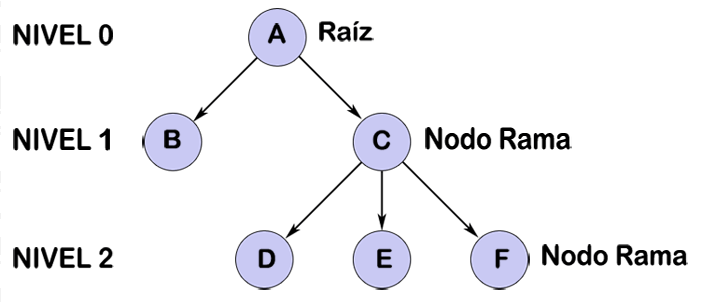

## **Puntos importantes sobre el crecimiento de los árboles**


- Si cultivamos el árbol completo, **lo mejor primero (por hoja)** y **profundidad primero (por nivel)** darán como resultado el mismo árbol. La diferencia está en el orden en que se expande el árbol. Dado que normalmente no cultivamos árboles en toda su profundidad, el orden es importante.

- La aplicación de criterios de parada temprana y métodos de poda puede dar como resultado árboles muy diferentes. Debido a que leaf-wise elige divisiones en función de su contribución a la pérdida global y no solo la pérdida a lo largo de una rama en particular, a menudo (no siempre) aprenderá árboles de menor error "más rápido" que en nivel.

- Para una pequeña cantidad de nodos, el nivel de hoja probablemente supere el nivel. A medida que agreguemos más nodos, sin detenerlos ni podarlos, convergerán al mismo rendimiento porque eventualmente construirán literalmente el mismo árbol.

# **3. XGBoost Vs LightGBM** <a class="anchor" id="3"></a>


[Table of Contents](#0.1)



- [XGBoost](https://github.com/dmlc/xgboost) es un algoritmo ML muy rápido y preciso. Pero ahora ha sido desafiado por [LightGBM](https://github.com/microsoft/LightGBM), que se ejecuta incluso más rápido con una precisión de modelo comparable y más hiperparámetros para que los usuarios ajusten.

- La diferencia clave en la velocidad es que **XGBoost divide los nodos del árbol un nivel a la vez** y **LightGBM hace ese nodo a la vez**.

- Entonces, los desarrolladores de XGBoost mejoraron más tarde sus algoritmos para ponerse al día con LightGBM, lo que permitió a los usuarios ejecutar XGBoost en modo dividido por hoja `(grow_policy = 'lossguide')`. Ahora, XGBoost es mucho más rápido con esta mejora, pero LightGBM sigue siendo aproximadamente 1,3X — 1,5X la velocidad de XGB.

- Otra diferencia entre XGBoost y LightGBM es que XGBoost tiene una función de la que carece LightGBM: **restricción monotónica**. Sacrificará parte de la precisión del modelo y aumentará el tiempo de entrenamiento, pero puede mejorar la interpretación del modelo.

# **4. LightGBM Parametros** <a class="anchor" id="4"></a>


[Table of Contents](#0.1)


- [LightGBM](https://github.com/microsoft/LightGBM) proporciona más de 100 [parámetros de LightGBM](https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst).

- Es muy importante conocer algunos parámetros básicos de LightGBM.

- Entonces, en esta sección, discutiré algunos parámetros básicos de LightGBM.



## **4.1 Parámetros de control** <a class="anchor" id="4.1"></a>


[Table of Contents](#0.1)

- **max_ depth** : Describe la profundidad máxima del árbol. Este parámetro se usa para manejar el sobreajuste del modelo. Si cree que su modelo está sobreajustado, debe reducir la profundidad máxima.

- **min_data_in_leaf** : Es el número mínimo de registros que puede tener una hoja. El valor por defecto es 20, valor óptimo. También se utiliza para tratar el sobreajuste.

- **feature_fraction**: se usa cuando tu impulso es un bosque aleatorio. La fracción de características de 0.8 significa que LightGBM seleccionará el 80% de los parámetros aleatoriamente en cada iteración para construir árboles.

- **bagging_fraction**: especifica la fracción de datos que se usará para cada iteración y generalmente se usa para acelerar el entrenamiento y evitar el sobreajuste.

- **early_stopping_round** : este parámetro puede ayudarlo a acelerar su análisis. El modelo dejará de entrenarse si una métrica de un dato de validación no mejora en las últimas rondas de Early_Stopping_Round. Esto reducirá las iteraciones excesivas.

- **lambda** : lambda especifica la regularización. El valor típico varía de 0 a 1.

- **min_gain_to_split** : Este parámetro describirá la ganancia mínima para realizar un split. Se puede utilizar para controlar el número de divisiones útiles en el árbol.

- **max_cat_group** : cuando el número de categorías es grande, es fácil encontrar el punto de división en un ajuste excesivo. Entonces LightGBM los fusiona en grupos 'max_cat_group' y encuentra los puntos de división en los límites del grupo, por defecto: 64.

## **4.2 Parámetros básicos** <a class="anchor" id="4.2"></a>


[Table of Contents](#0.1)
- **Tarea**: Especifica la tarea que desea realizar en los datos. Puede ser entrenar o predecir.

- **aplicación**: este es el parámetro más importante y especifica la aplicación de su modelo, ya sea un problema de regresión o un problema de clasificación. LightGBM considerará por defecto el modelo como un modelo de regresión.

   - **regresión** : para regresión
   - **binary** : para clasificación binaria
   - **multiclase** : para problemas de clasificación multiclase
  
  
- **boosting** : define el tipo de algoritmo que desea ejecutar, por defecto=gdbt.

   - **gbdt** : árbol de decisión de aumento de gradiente tradicional
   - **rf**: bosque aleatorio
   - **dardo**: los abandonos se encuentran con árboles de regresión aditivos múltiples
   - **goss**: Muestreo de un lado basado en gradiente
  
  
- **num_boost_round**: número de iteraciones de impulso, normalmente más de 100

- **learning_rate**: Esto determina el impacto de cada árbol en el resultado final. GBM funciona comenzando con una estimación inicial que se actualiza utilizando la salida de cada árbol. El parámetro de aprendizaje controla la magnitud de este cambio en las estimaciones. Valores típicos: 0.1, 0.001, 0.003…

- **num_hojas**: número de hojas en el árbol completo, por defecto: 31

- **dispositivo**: predeterminado: cpu, también puede pasar gpu

## **Parámetro métrico** <a class="anchor" id="4.3"></a>


[Table of Contents](#0.1)

- metric: nuevamente uno de los parámetros importantes ya que especifica la pérdida para la construcción del modelo. A continuación se presentan algunas pérdidas generales por regresión y clasificación.

   - **mae** : error absoluto medio
   - **mse** : error cuadrático medio
   - **binary_logloss** : pérdida por clasificación binaria
   - **multi_logloss** : pérdida por clasificación múltiple

## **4.4 IO Parametros** <a class="anchor" id="4.4"></a>


[Table of Contents](#0.1)

- **max_bin**: indica el número máximo de contenedores en los que se acumulará el valor de la característica.

- **categorical_feature** : Denota el índice de características categóricas. Si categorical_features=0,1,2 entonces la columna 0, la columna 1 y la columna 2 son variables categóricas.

- **ignore_column**: igual que categorical_features solo que en lugar de considerar columnas específicas como categóricas, las ignorará por completo.

- **save_binary**: si realmente está tratando con el tamaño de la memoria de su archivo de datos, especifique este parámetro como 'Verdadero'. Especificar el parámetro verdadero guardará el conjunto de datos en un archivo binario, este archivo binario acelerará el tiempo de lectura de datos para la próxima vez.

Ahora, pasamos a la implementación de LightGBM.

# **5. LightGBM implementación in Python** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)

## **Inicia Configuración**

In [1]:
# Este entorno de Python 3 viene con muchas bibliotecas de análisis útiles instaladas
# Por ejemplo, aquí hay varios paquetes útiles para cargar

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


# Los archivos de datos de entrada están disponibles en el directorio "../input/".
# Por ejemplo, ejecutar esto (haciendo clic en Ejecutar o presionando Shift+Enter) enumerará todos los archivos en el directorio de entrada
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Cualquier resultado que escriba en el directorio actual se guarda como salida.

In [2]:
# ignorar warnings
import warnings
warnings.filterwarnings("ignore")

## **Leer dataset**

In [3]:
# cargar y previsualizar datos
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


### Variables del conjunto de datos

mean radius     -  radio medio      
mean texture    -  textura mala    
mean perimeter  -  perímetro medio    
mean area       -  área media   
mean smoothness -  suavidad media   
dianosis        -  diagnóstico   

## **Ver resumen del dataset**

In [4]:
# ver resumen del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


- Podemos ver que hay 6 columnas en el conjunto de datos y no faltan valores..

## **Comprobar la distribución de la variable objetivo**

- la variable objetivo es el diagnóstico
- comprobar la distribución de la variable objetivo.

In [5]:
# comprobar la distribución de la variable objetivo
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

- La variable objetivo es `diagnóstico`. Contiene 2 valores - 0 y 1.

- `0` es para **Predicción negativa** y `1` para **Predicción positiva**.

- Podemos ver que el problema es una tarea de clasificación binaria.

## **Declarar vector de características y variable de destino**

In [6]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

## **Divida el conjunto de datos en un conjunto de entrenamiento y prueba**

In [7]:
# dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## **Desarrollo y entrenamiento del modelo LightGBM**


- Necesitamos convertir nuestros datos de entrenamiento al formato de conjunto de datos de LightGBM (esto es obligatorio para el entrenamiento de LightGBM).

- Después de crear el conjunto de datos necesario, creamos un diccionario de Python con parámetros y sus valores.

- La precisión del modelo depende de los valores que proporcionemos a los parámetros.

- En el bloque de código final, simplemente entrenamos el modelo con 100 iteraciones.

In [8]:
# construir el modelo lightgbm
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

## **Predicción del modelo**

In [9]:
# predecir los resultados
y_pred=clf.predict(X_test)


## **Ver Accuracy (Precisión)**

In [10]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Puntuación de precisión del modelo LightGBM: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo LightGBM: 0.9298


- Aquí, `y_test` son las etiquetas de clase verdaderas e `y_pred` son las etiquetas de clase predichas en el conjunto de prueba.

## **Compare la precisión del tren y del conjunto de pruebas**

- Ahora, compararé la precisión del conjunto de trenes y del conjunto de prueba para verificar si hay sobreajuste.

In [11]:
y_pred_train = clf.predict(X_train)

In [12]:
print('Puntuación de precisión del conjunto de entrenamiento: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Puntuación de precisión del conjunto de entrenamiento: 1.0000


## **Compruebe si hay sobreajuste**

In [13]:
# imprimir los puntajes en el conjunto de entrenamiento y prueba

print('Puntuación del conjunto de entrenamiento: {:.4f}'.format(clf.score(X_train, y_train)))

print('Puntuación del conjunto de pruebas: {:.4f}'.format(clf.score(X_test, y_test)))

Puntuación del conjunto de entrenamiento: 1.0000
Puntuación del conjunto de pruebas: 0.9298


-La precisión del conjunto de entrenamiento y prueba es bastante comparable. Por lo tanto, no podemos decir que haya sobreajuste.

## **Matrix de Confusión**

In [14]:
# ver  matrix de confusión
# Imprima la matriz de confusión y córtela en cuatro partes

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Matrix de confusión\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Matrix de confusión

 [[ 55   8]
 [  4 104]]

True Positives(TP) =  55

True Negatives(TN) =  104

False Positives(FP) =  8

False Negatives(FN) =  4


<AxesSubplot:>

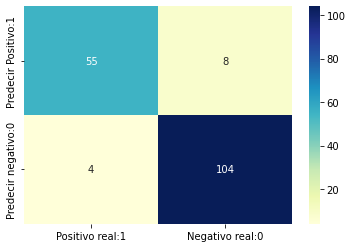

In [15]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Positivo real:1', 'Negativo real:0'], 
                                 index=['Predecir Positivo:1', 'Predecir negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **Métricas de clasificación** 

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



[Go to Top](#0)